# 1.
The key factor that differenciates between ideas that can be examined and tested statistically is the availability of data. I think a good null hypothesis should be short making it easy read and understand, and clearly state the relationship between the variables. The null hypothesis is the hypothesis to be tested and researchers typically want to reject the hypothesis, whereas the alternative hypothesis is everything else (the null hypothesis is false).

# 2.
The null hypothesis is written in the form $H_0:\mu=\mu_0$, which states that the mean of the entire population $\mu$ is equal to some value $\mu_0$. Since it is usually impractical to sample the entire population, only a portion of the population is sampled. The mean of the sample ($\bar{x}$) is calculated by $\bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}$, where the $x_i$ s are the sample values. In order to make sure that the calculated statistic of this sample is an accurate representation of the entire population (i.e. $\mu_0=\bar{x}$), procedures like bootstrapping is performed on the data to ensure that the result is on the entire population instead of the sampled data.

# 3.
Attempt to prove that the null hypothesis is false by assuming it is True and see if you can prove it is false by contradiction.

# 4.
Because the p-value is the probability of extreme cases like what is observed in the sample statistic happens if the null hypothesis is true, hence the smaller the p-value/probability is, it is less likely to have the sample statistic occur, therefore less likely the null hypothesis is true.

# 5.

In [24]:
import numpy as np

np.random.seed(1)
simulation_num = 10000
n = 124
test_stats = np.zeros(simulation_num)

for i in range(simulation_num):
    random_tilt = np.random.choice([0,1], size=n, replace=True)
    test_stats[i] = random_tilt.mean()

null_hyp_true = 0.5
observed_stat = 80 / 124

p_value = sum([abs(k - null_hyp_true) >= observed_stat - null_hyp_true for k in test_stats]) / simulation_num
p_value

0.0015

Strong evidence against null hypothesis

# 6.
A smaller p-value decreases the probability of extreme cases like the observed statistic happening if the null-hypothesis is true, although the probability may be extremely small, as long as it is never zero, then no matter how small the p-value is, there will always be a very slim chance of a type I error occuring where the null hypothesis is wrongly rejected. Therefore, we cannot definitively prove the null hypothesis is false. It is not possible to definitively prove Fido is innocent or guilty using p-value because as mentioned earlier, p-value is a probability, no matter how probable it seems that Fido is guilty, there is always a small probability that the neighbor climbs in through the window, hence the conclusion is never definitive. If the p-value is zero, then we can definitively prove the null hypothesis is false as in none of the parallel universes did extreme cases like the observed statistic occured under the condition that the null hypothesis is true. conversely if the p-value is one, then we can definitively prove the null hypothesis is false as extreme cases like the observed statistic occured in every parallel universe under the condition that the null hypothesis is true.

# 7.
Replace
```python
SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    abs(simulated_test_statistics - population_parameter_value_under_H0) >= \
    abs(observed_test_statistic - population_parameter_value_under_H0)
```
with
```python
SimTestStats_as_or_more_extreme_than_ObsTestStat = simulated_test_statistics >= observed_test_statistic
```
so that we are only considering simulations with extreme cases that are greater than or equal to the observed statistic. In this case, the null hypothesis would be the proportion of patients who show health score improvement is less than 0.5, and the alternative hypothesis would be the proportion of patients who show health score improvement is greater than 0.5. I would expect the p-value to decrease because there are fewer simulations that are just >= 0.8 compared to simulations that are >= 0.8 or <= 0.3.

##### ChatBot Summary
Here’s a concise summary of our interactions:

Original Task: You provided a Python code to compute a two-sided hypothesis test for the proportion of patients showing health score improvement, with a p-value calculated based on random simulations under the null hypothesis (H0: improvement proportion = 0.5).

Adjustment: You asked to modify the code for a one-sided hypothesis test. The code was adjusted to test whether the proportion of patients with health score improvement is greater than 0.5 by only considering simulated test statistics greater than the observed one.

Interpretation: We discussed how switching to a one-sided test changes the focus to deviations in only one direction (in this case, testing if the proportion is greater than 0.5). This alters the p-value calculation and how the test results are interpreted: in the one-sided case, you only reject $H_0$ if the observed statistic is significantly greater than 0.5.

Let me know if you need further clarification or details!

Link: https://chatgpt.com/share/670b2c80-1708-8011-bdab-9b0e8f9265eb

# 8.
If there is no difference in the taste of tea if the order of adding milk and tea were changed. Then everyone would be randomly guessing, and the probability of guessing it right would be 50%.
$$H_0: \text{There is no difference in taste if the order of adding tea and milk were changed.}$$
or equivalently $$H_0: \text{The propability of guessing it right is 50\%}$$
$$H_A: H_0\text{ is false i.e. There is a difference in taste.}$$
Then begin simulating assuming the null hypothesis is true and setting the $\alpha$-significance level to $0.05$.

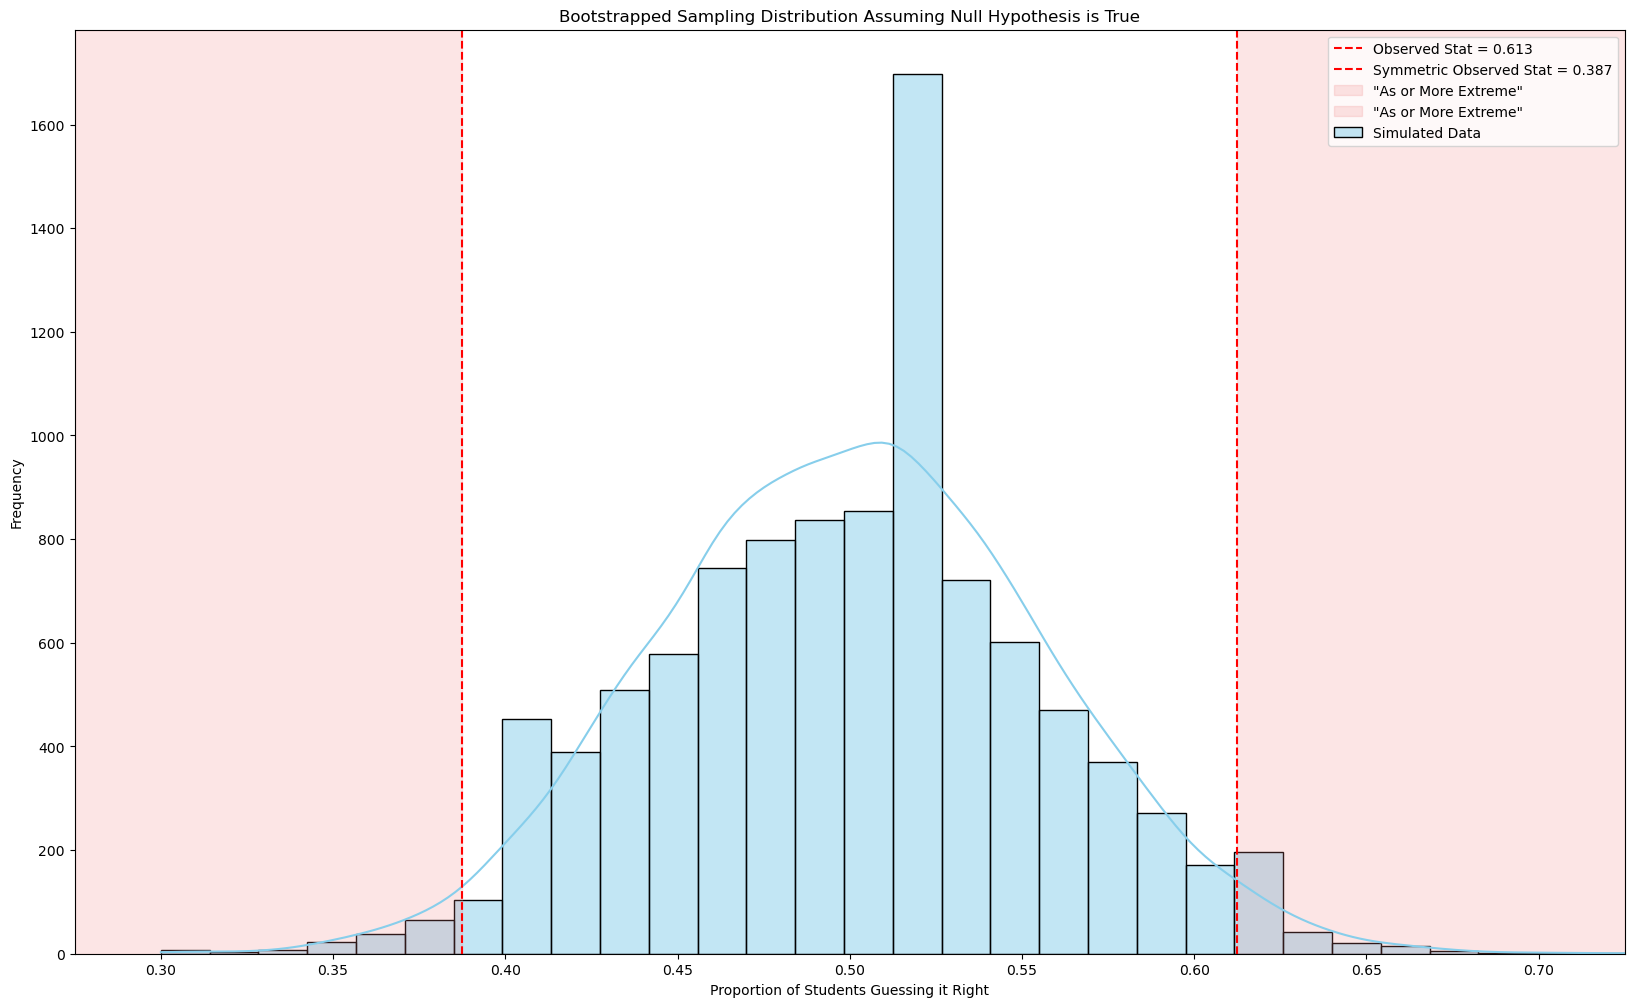

Number of Simulations: 10000

Number of simulated test statistics (under HO)
that are "as or more extreme" than the observed test statistic: 429

p-value
(= simulations "as or more extreme" / total simulations): 0.0429


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

observed_statistic = 49 / 80

np.random.seed(10)  # make simulation reproducible
num_simulations = 10000
n = 80
simulations = np.zeros(num_simulations)

for i in range(num_simulations):
    simulations[i] = np.random.choice([0,1], size=n, replace=True).mean()

null_hyp_true = 0.5

as_or_more_extreme = abs(simulations - null_hyp_true) >= abs(observed_statistic - null_hyp_true)
    
p_value = (as_or_more_extreme).sum() / num_simulations

plt.figure(figsize=(20, 12))
sns.histplot(simulations, bins=30, kde=True, color='skyblue', edgecolor='black', label='Simulated Data')

# Lable observed statistic and its symmetric on the left side
symmetric_observed_statistic = 2*null_hyp_true - observed_statistic
plt.axvline(observed_statistic, color='red', linestyle='--', label=f'Observed Stat = {observed_statistic:.3f}')
plt.axvline(symmetric_observed_statistic, color='red', linestyle='--', label=f'Symmetric Observed Stat = {symmetric_observed_statistic:.3f}')

# Shade in regions that are as or more extreme
plt.axvspan(xmin=0.275, xmax=symmetric_observed_statistic, color='lightcoral', alpha=0.2, label='"As or More Extreme"')
plt.axvspan(xmin=observed_statistic, xmax=0.725, color='lightcoral', alpha=0.2, label='"As or More Extreme"')
plt.xlim(left=0.275, right=0.725)

# Customize plot
plt.title('Bootstrapped Sampling Distribution Assuming Null Hypothesis is True')
plt.xlabel('Proportion of Students Guessing it Right')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

print("Number of Simulations: ", num_simulations, "\n\n",
      "Number of simulated test statistics (under HO)\n",
      'that are "as or more extreme" than the observed test statistic: ',
      as_or_more_extreme.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

The p-value shows moderate evidence against the null hypothesis and it is less than the $\alpha$-significance level, hence the null hypothesis is rejected, hence there is a taste difference. It is important to note that most of the STA130 students did not drink a lot of tea with milk, hence they wouldn't be able to tell the difference in taste even if there is one, which explains why the mean is close to 0.5. Additionally, the simulations may not be perfectly random as the bin from approximately 0.52-0.53 has twice the frequency as all of the other bins, which could be an indication that the rng used is skewed hence influencing the p-value obtained.

# 9.
Yes I interacted with a ChatBot.